In [1]:
import pandas as pd

In [8]:
data = pd.read_json('all_jobs.json')

In [11]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Create a set of stopwords
stop = set(stopwords.words('english'))

# Create a set of punctuation words 
exclude = set(string.punctuation) 

# This is the function makeing the lemmatization
lemma = WordNetLemmatizer()

# In this function we perform the entire cleaning
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# This is the clean corpus.
doc_clean = [clean(doc).split() for doc in data.description]

In [14]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [15]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=20, id2word = dictionary, passes=5)

In [16]:
topics = ldamodel.print_topics(num_topics=20, num_words=5)

i=0
for topic in topics:
    print ("Topic",i ,"->", topic)
    i+=1

Topic 0 -> (0, '0.039*"dynamic" + 0.030*"ax" + 0.029*"microsoft" + 0.024*"experience" + 0.016*"opportunity"')
Topic 1 -> (1, '0.033*"support" + 0.018*"role" + 0.018*"experience" + 0.017*"employment" + 0.016*"spring"')
Topic 2 -> (2, '0.020*"work" + 0.019*"looking" + 0.014*"you" + 0.013*"want" + 0.012*"get"')
Topic 3 -> (3, '0.033*"role" + 0.026*"engineer" + 0.025*"company" + 0.022*"technical" + 0.016*"training"')
Topic 4 -> (4, '0.036*"client" + 0.027*"account" + 0.025*"financial" + 0.020*"manager" + 0.016*"business"')
Topic 5 -> (5, '0.018*"site" + 0.015*"scheme" + 0.012*"delivery" + 0.012*"service" + 0.011*"driving"')
Topic 6 -> (6, '0.020*"hour" + 0.014*"per" + 0.013*"work" + 0.013*"day" + 0.013*"job"')
Topic 7 -> (7, '0.025*"developer" + 0.020*"software" + 0.017*"experience" + 0.017*"engineer" + 0.016*"development"')
Topic 8 -> (8, '0.019*"opportunity" + 0.018*"project" + 0.017*"recruitment" + 0.017*"role" + 0.015*"client"')
Topic 9 -> (9, '0.046*"ein" + 0.034*"cnc" + 0.032*"learni

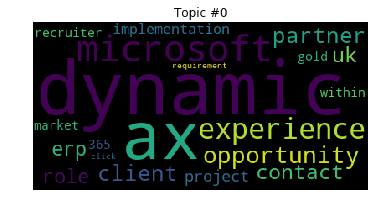

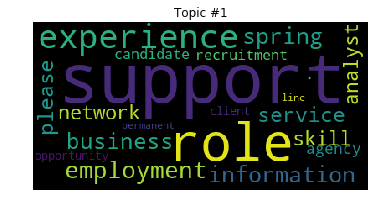

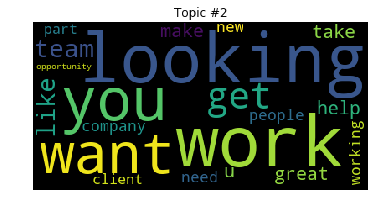

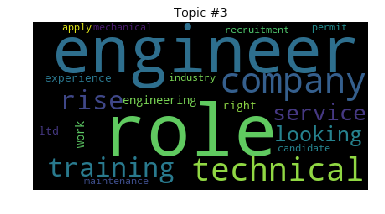

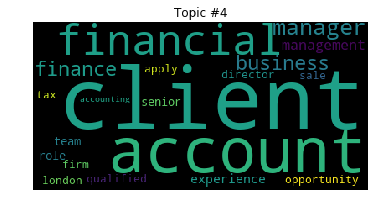

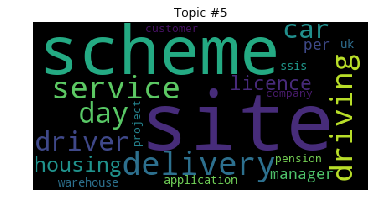

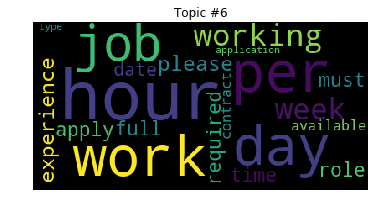

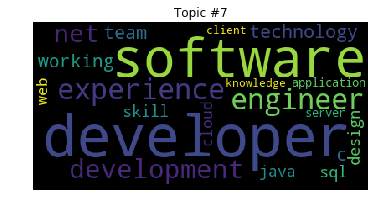

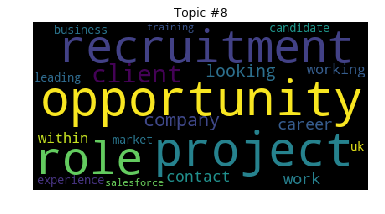

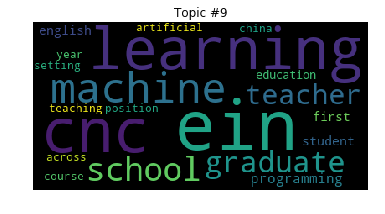

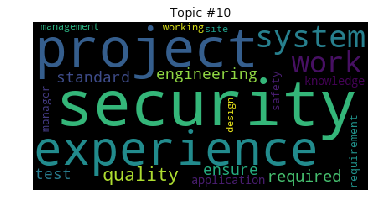

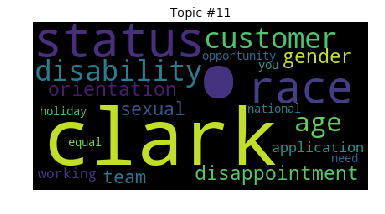

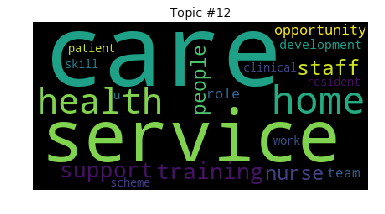

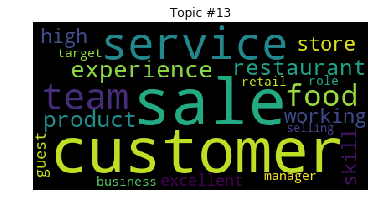

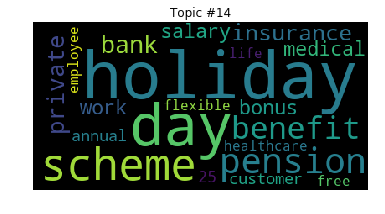

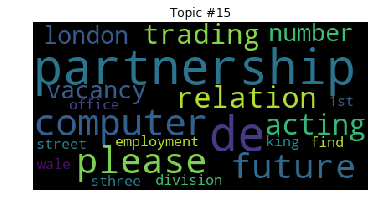

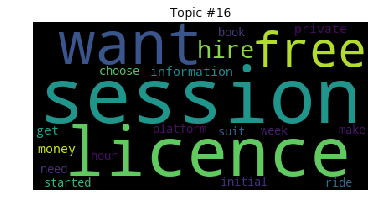

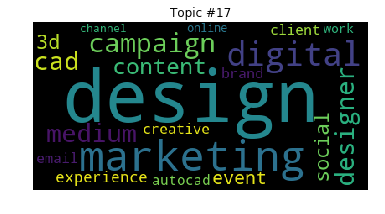

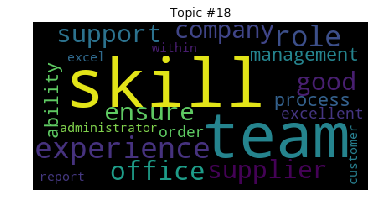

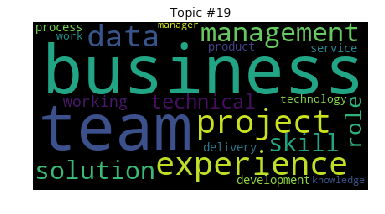

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(t, 20))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()